<a href="https://colab.research.google.com/github/dj-stat-2004/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_EDA_MODEL_PREDICTOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA;
The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Installing the Packages:

In [ ]:
import numpy as np
import pandas as pd
import time
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

!pip install imblearn
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    validation_curve,
    StratifiedShuffleSplit,
    KFold,
)
from sklearn.feature_selection import mutual_info_classif
from imblearn.under_sampling import NearMiss
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import (
    Ridge,
    Lasso,
    LogisticRegression,
    LogisticRegressionCV,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Exploratory Data Analysis**

In [ ]:
# Mounting the google drive
from google.colab import drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## LOAD THE DATA

In [ ]:
# Loading the data
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/creditcard_23.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


from matplotlib import pyplot as plt
_df_32['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='index', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['V4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('V4')

from matplotlib import pyplot as plt
_df_44['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

## READ THE DATA

In [ ]:
#checking the shape
df.shape

(284807, 31)

In [ ]:
#checking the datatypes and null/non-null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Separating the data for data analysis

In [ ]:
real=df[df.Class == 0]
fraud=df[df.Class == 1]
print(real.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#checking distribution of numerical values in the dataset
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64



The real(non-fraud) transaction have a larger mean value, larger Q1, smaller Q3 and Q4 and larger outliers while fraudulent transactions have a smaller Q1 and mean, larger Q4 and smaller outliers.


In [ ]:
#Comparing the values for both type of transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


from matplotlib import pyplot as plt
_df_16['Class'].plot(kind='hist', bins=20, title='Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Time'].plot(kind='hist', bins=20, title='Time')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['V1'].plot(kind='hist', bins=20, title='V1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['V2'].plot(kind='hist', bins=20, title='V2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Class', y='Time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='Time', y='V1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='V1', y='V2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='V2', y='V3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V5']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V5')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Class']
  ys = series['V6']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('Class', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Class')
_ = plt.ylabel('V6')

from matplotlib import pyplot as plt
_df_28['Class'].plot(kind='line', figsize=(8, 4), title='Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['Time'].plot(kind='line', figsize=(8, 4), title='Time')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['V1'].plot(kind='line', figsize=(8, 4), title='V1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['V2'].plot(kind='line', figsize=(8, 4), title='V2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Checking the class distribution of the target variable
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

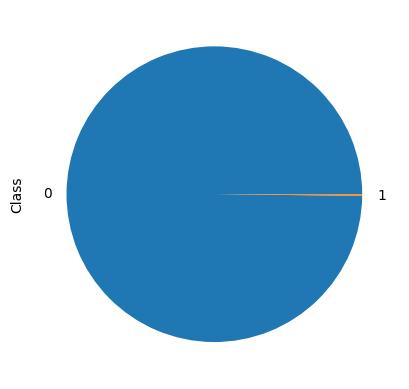

In [ ]:
#Checking the class distribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()

In [ ]:
#Checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100
print('Normal share: ', normal_share)
print('Fraud share: ', fraud_share)

Normal share:  99.82725143693798
Fraud share:  0.1727485630620034


So, the Non-fraud Transactions accounted are **99.827%** but fraud transactions accounted are **0.173%** approximately.

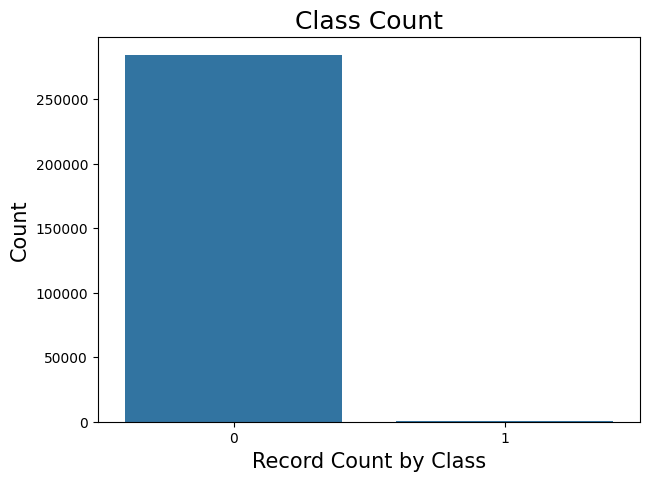

In [ ]:
#Create a bar diagram for the number and percentage of the fradulent vs non-fradulent transactions
plt.figure(figsize=(7,5))
sns.countplot(x='Class', data=df)
plt.title("Class Count", fontsize=18)
plt.xlabel("Record Count by Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

Only **492**(or **0.172%**) of transactions are fradulent. So, the data is highly unbalanced with respect to target variable **Class**.

## **Data Exploration**
# Transactions in time

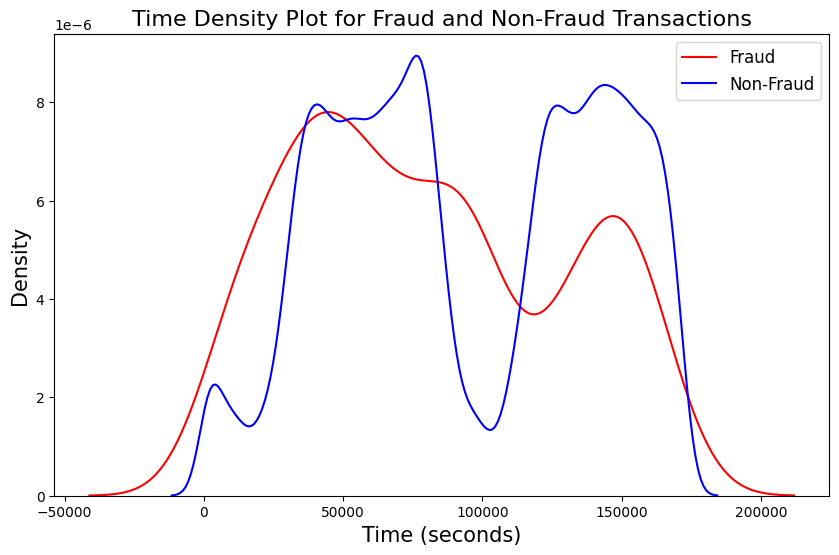

In [ ]:
# Generated a time density plot for fraud and non fraud data

# Separate fraud and non-fraud transactions
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Create the time density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(fraud['Time'], color='red', label='Fraud')
sns.kdeplot(non_fraud['Time'], color='blue', label='Non-Fraud')

# Add plot details
plt.title('Time Density Plot for Fraud and Non-Fraud Transactions', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(fontsize=12)
plt.show()



Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transaction, as well as to aggregated values of transaction count and amount, per hour. We assume (based on observation of the time distribution of transactions) that the time unit is second.

In [ ]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
dff = pd.DataFrame(tmp)
dff.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
dff.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


from matplotlib import pyplot as plt
_df_0['Hour'].plot(kind='hist', bins=20, title='Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Class'].plot(kind='hist', bins=20, title='Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Min'].plot(kind='hist', bins=20, title='Min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Max'].plot(kind='hist', bins=20, title='Max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Hour', y='Class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Class', y='Min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Min', y='Max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Max', y='Transactions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hour']
  ys = series['Class']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('Class')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hour']
  ys = series['Min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('Min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hour']
  ys = series['Max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('Max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Hour']
  ys = series['Transactions']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Hour', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Hour')
_ = plt.ylabel('Transactions')

from matplotlib import pyplot as plt
_df_12['Hour'].plot(kind='line', figsize=(8, 4), title='Hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Class'].plot(kind='line', figsize=(8, 4), title='Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Min'].plot(kind='line', figsize=(8, 4), title='Min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Max'].plot(kind='line', figsize=(8, 4), title='Max')
plt.gca().spines[['top', 'right']].set_visible(False)

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


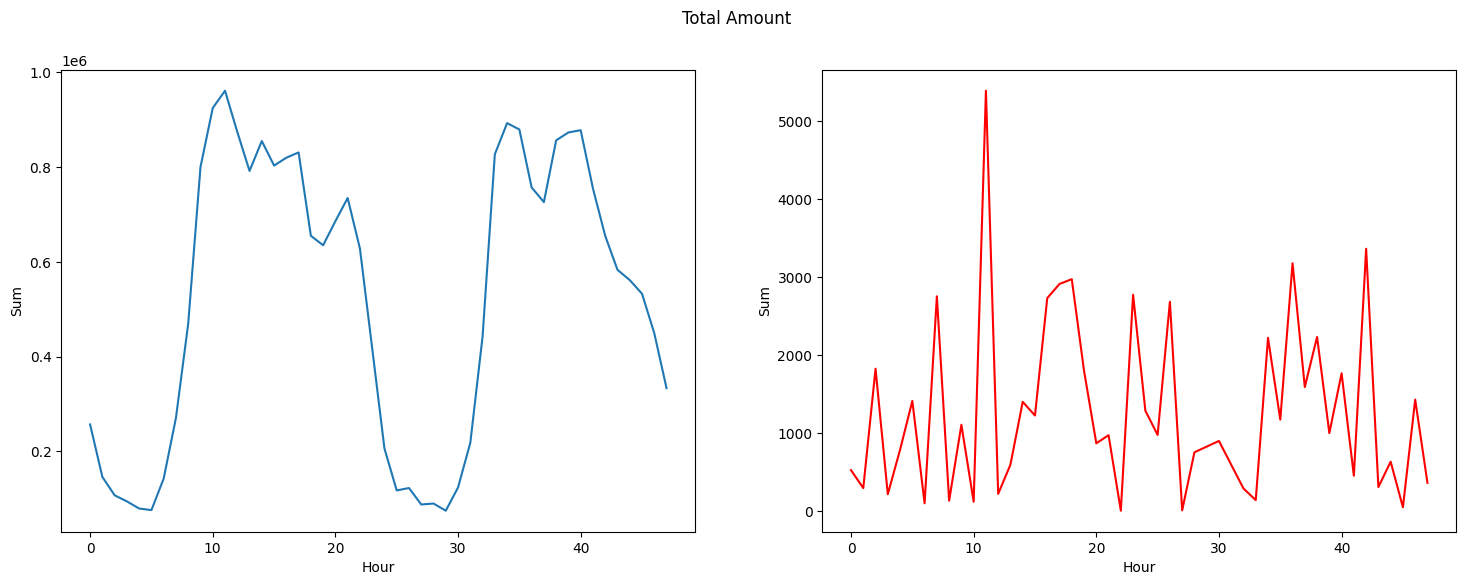

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=dff.loc[dff.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=dff.loc[dff.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

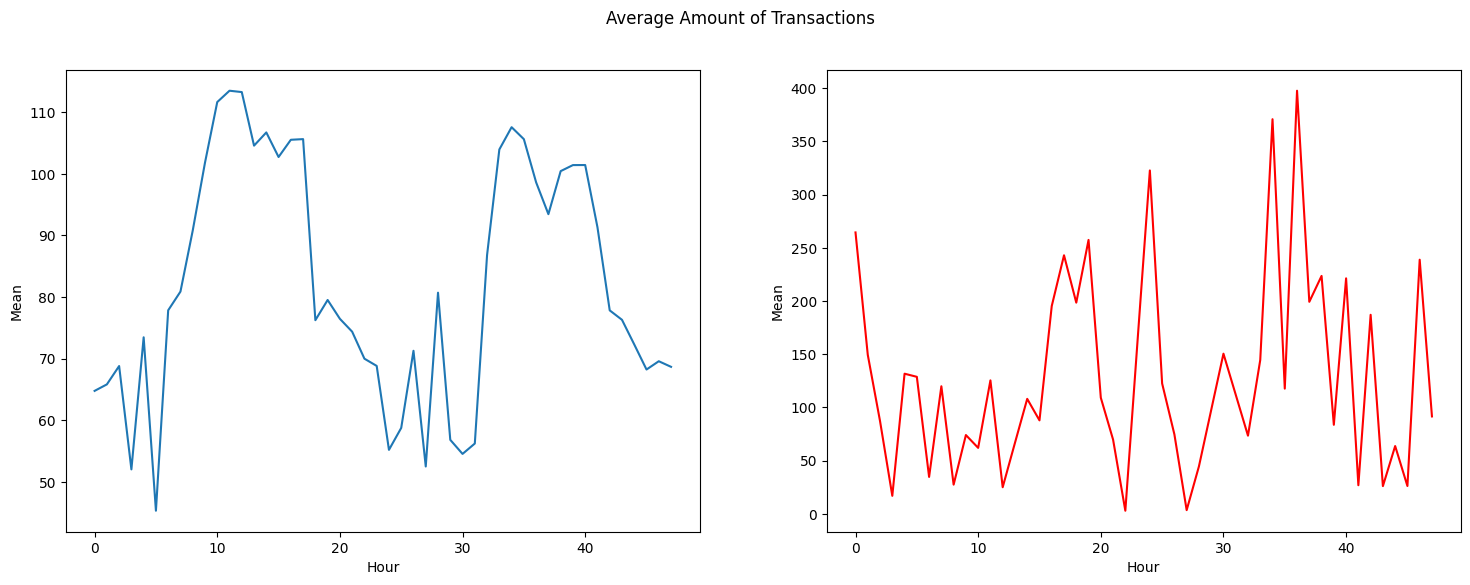

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=dff.loc[dff.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=dff.loc[dff.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();

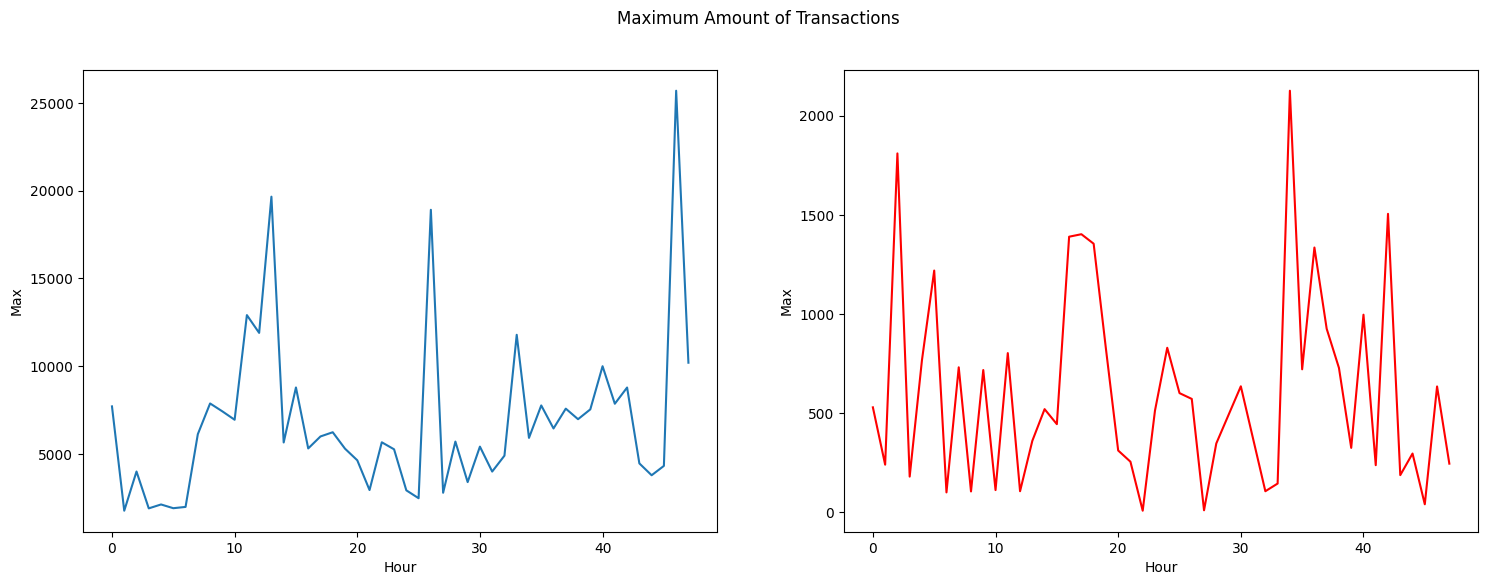

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=dff.loc[dff.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=dff.loc[dff.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();

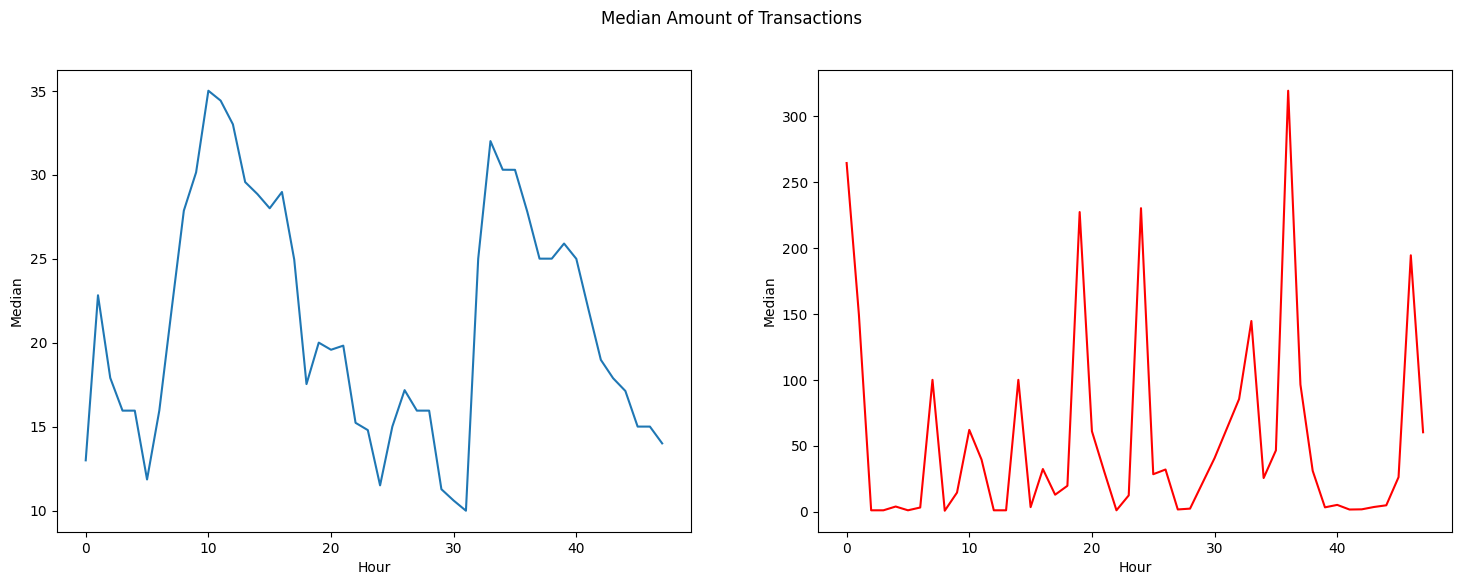

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=dff.loc[dff.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=dff.loc[dff.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

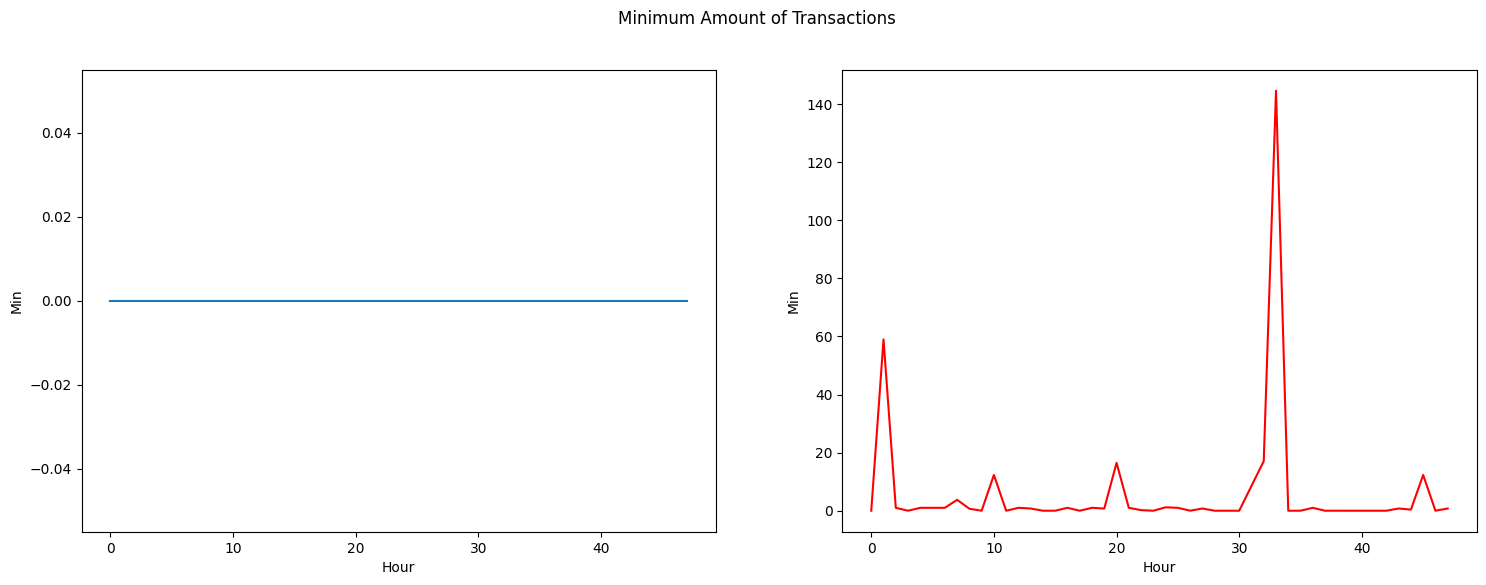

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=dff.loc[dff.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=dff.loc[dff.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

## **Transactions amount**

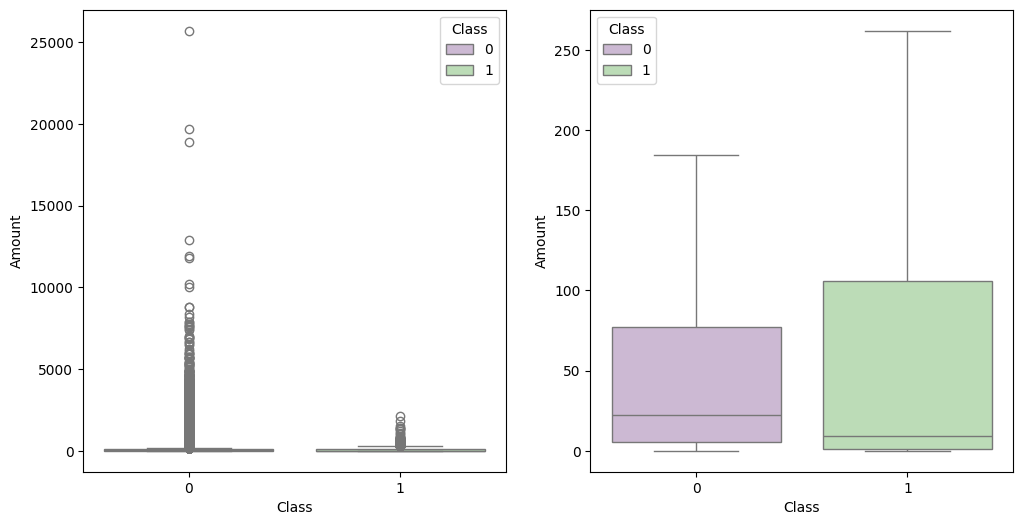

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y='Amount', hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y='Amount', hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

Now, we will plot the fraudulent transactions (amount) against time. The time is shown is seconds from the start of the time period (totaly 48h, over 2 days).

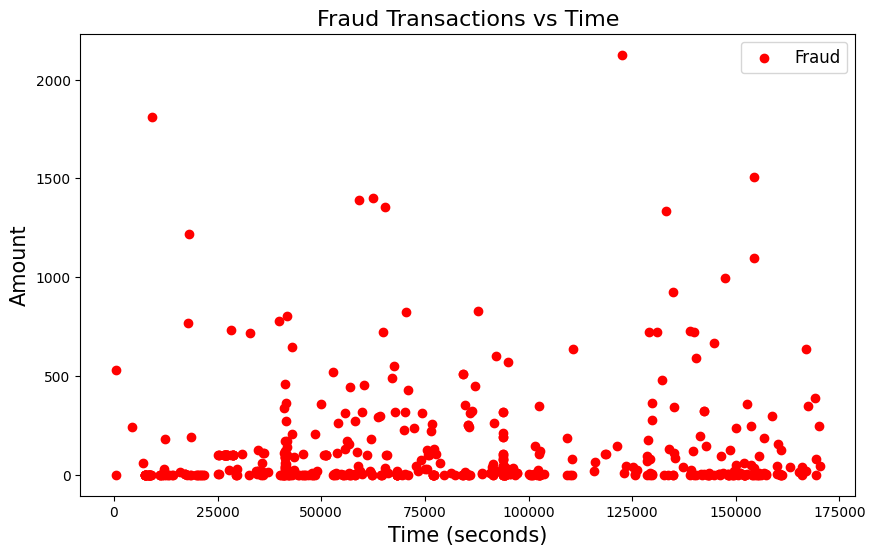

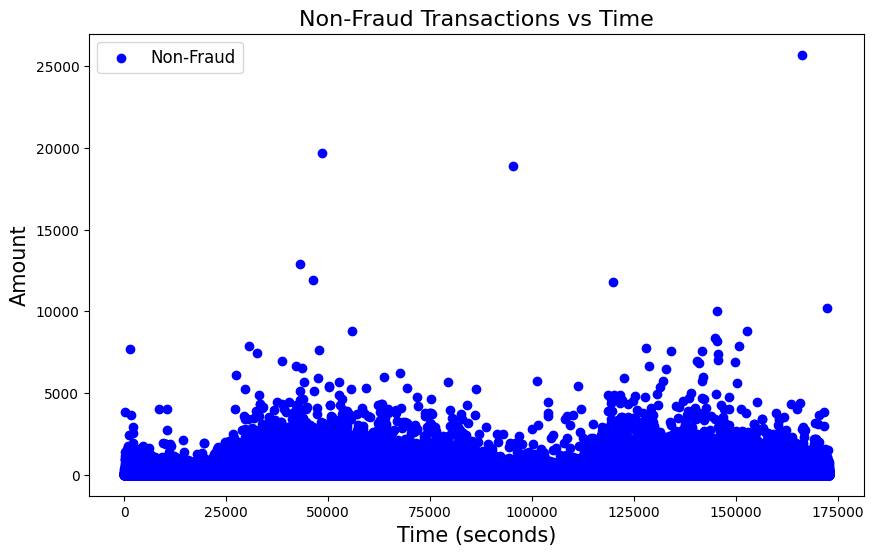

In [ ]:
# Two scatter plots for fraud transactions vs time and non fraud transactions vs time.

# Created two separate dataframes for fraud and non-fraud transactions
fraud_transactions = df[df['Class'] == 1]
non_fraud_transactions = df[df['Class'] == 0]

# Created the scatter plot for fraud transactions
plt.figure(figsize=(10, 6))
plt.scatter(fraud_transactions['Time'], fraud_transactions['Amount'], color='red', label='Fraud')
plt.title('Fraud Transactions vs Time', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.legend(fontsize=12)
plt.show()

# Created the scatter plot for non-fraud transactions
plt.figure(figsize=(10, 6))
plt.scatter(non_fraud_transactions['Time'], non_fraud_transactions['Amount'], color='blue', label='Non-Fraud')
plt.title('Non-Fraud Transactions vs Time', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Amount', fontsize=15)
plt.legend(fontsize=12)
plt.show()


In [ ]:
#Checking the correlation
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323,0.999758
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347,0.117666
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289,-0.010628
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961,-0.419601
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447,-0.105237
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974,0.173212
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643,-0.062980
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257,0.084751
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875,-0.037051
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733,-0.008041


As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Now,Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.


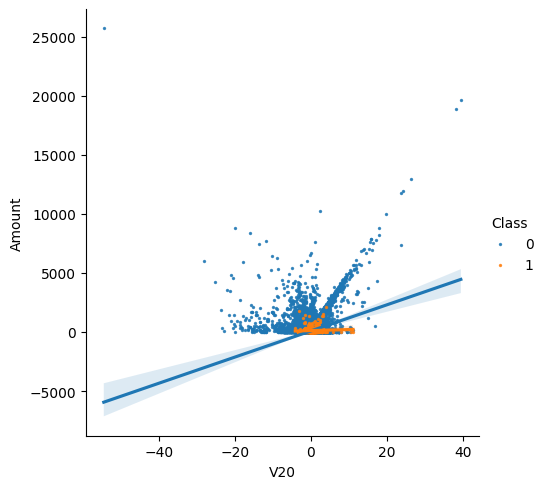

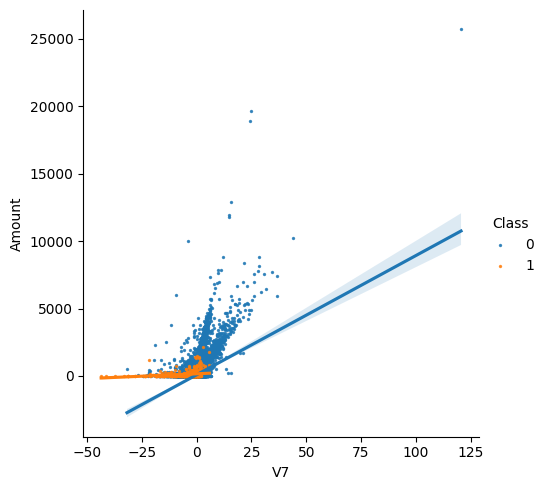

In [ ]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for Class = 0 have a positive slope, whilst the regression line for Class = 1 have a smaller positive slope).

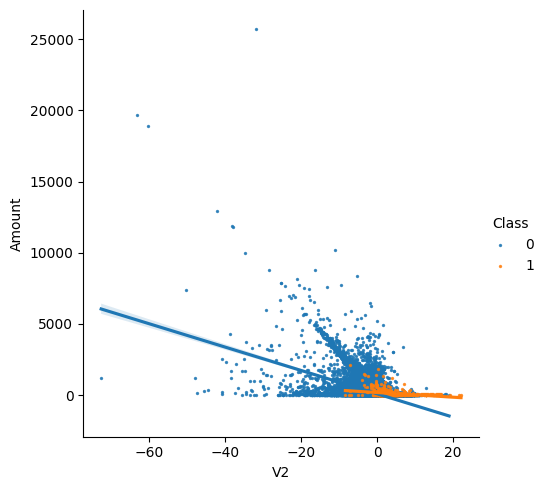

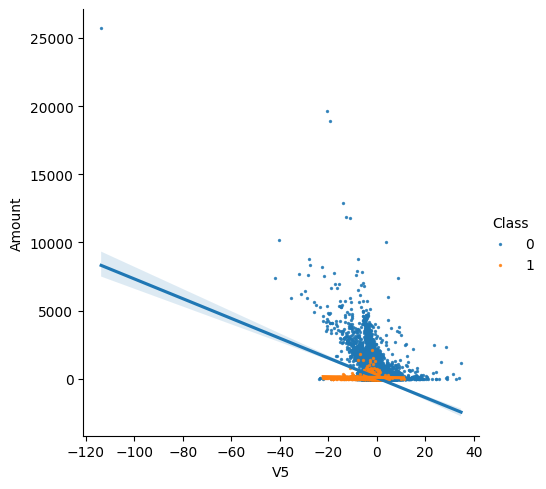

In [ ]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()



We can confirm that the two couples of features are inverse correlated (the regression lines for Class = 0 have a negative slope while the regression lines for Class = 1 have a very small negative slope).

*Now, we will observe a selectivity of features in terms of distribution.*

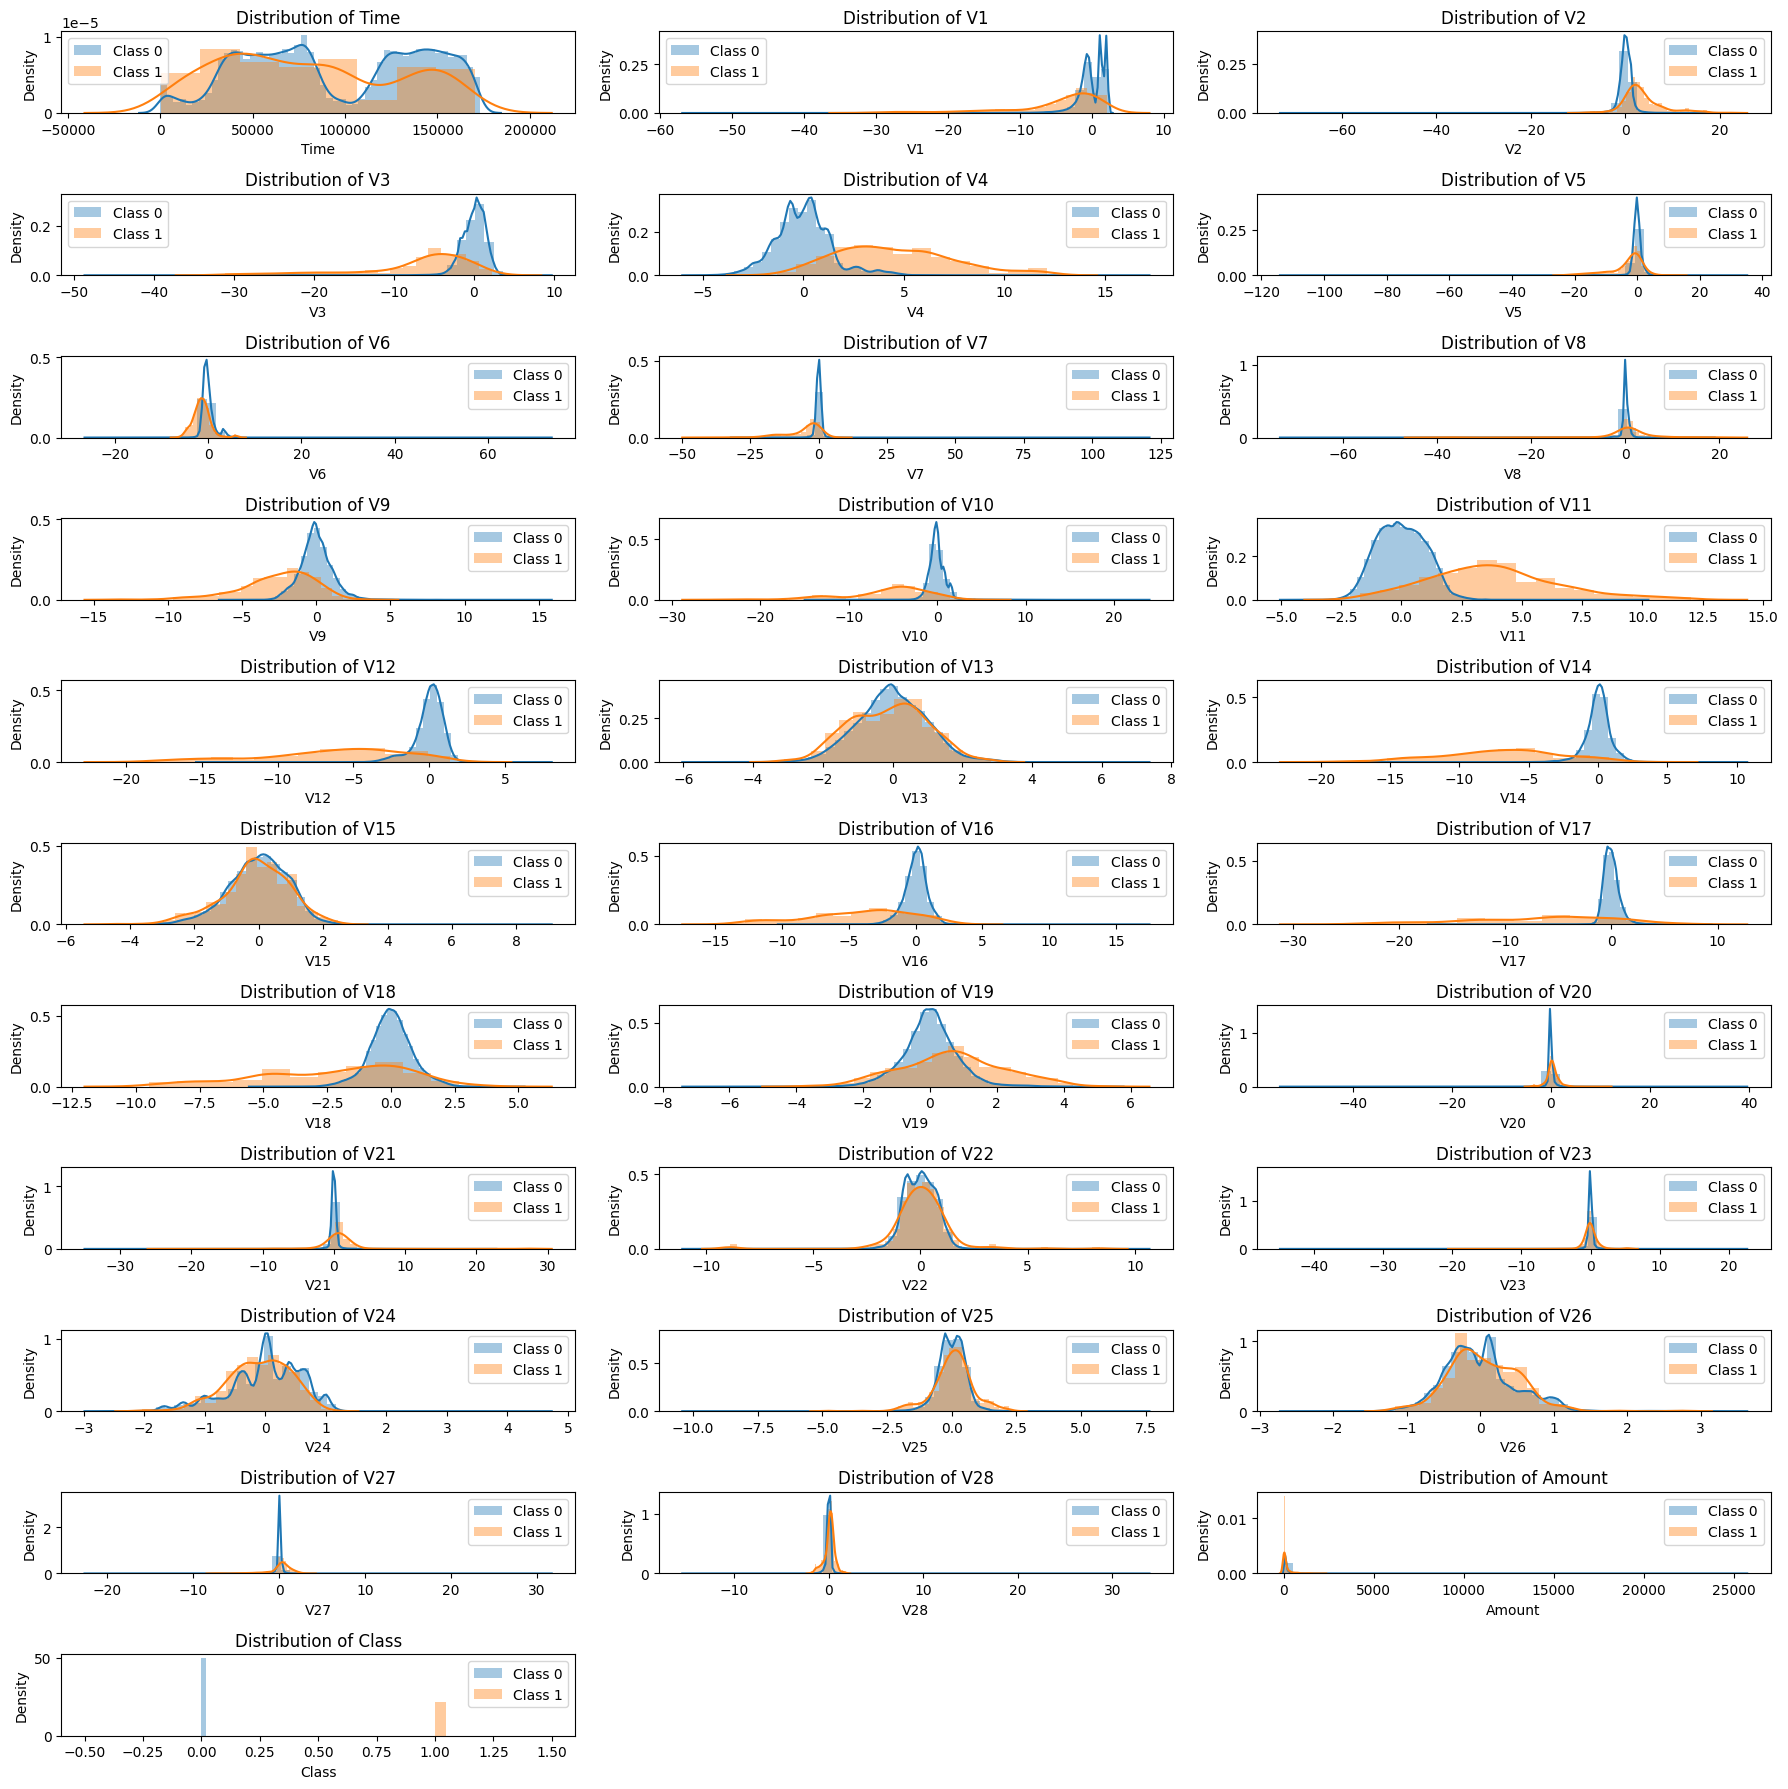

In [ ]:
# Calculate the number of rows and columns for the subplots
num_features = len(df.columns[:-1])  # Exclude the 'Class' column
num_rows = (num_features + 2) // 3  # Adjust the number of rows as needed
num_cols = 3

# Create the subplots with the correct dimensions
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 18))

# Plot the density plot for each feature
for i, feature in enumerate(df.columns[:-1]):
    ax = axes[i // 3, i % 3]
    sns.distplot(df[feature][df['Class'] == 0], ax=ax, label='Class 0', kde=True)
    sns.distplot(df[feature][df['Class'] == 1], ax=ax, label='Class 1', kde=True)
    ax.set_title(f'Distribution of {feature}')
    ax.legend()

# Remove any empty subplots
for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



For some features we can observe a good selectivity in terms of distribution for the two values of Class: ***V4, V11*** have clearly separated distributions for Class values 0 and ***1, V12, V14, V18*** are partially separated, ***V1, V2, V3, V10*** have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (***Time*** and ***Amount***), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.


# Under Sampling

In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

### Summary:

* Logistic Regression classifier is more accurate than the other three classifiers in most cases. (We will further analyze Logistic Regression)
* GridSearchCV is used to determine the paremeters that gives the best predictive score for the classifiers.
* Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that LogisticRegression pretty accurately separates fraud and non-fraud transactions.

### Learning Curves:

* The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
* If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)
* Logistic Regression Classifier shows the best score in both training and cross-validating sets.

### Finding the test scores

In [ ]:

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [ ]:
# Let's implement simple classifiers


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

*Training Score :*

In [ ]:
# Our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 67.0 % accuracy score
Classifiers:  SVC Has a training score of 56.99999999999999 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


After Finding the training score for four Classifiers, we find that the logistic Regression has a training accuracy score of 94% which is highest among four Classifiers.

In [ ]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

*Cross-Validation Score :*

In [ ]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score: ', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score: ', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.92%
Knears Neighbors Cross Validation Score:  66.58%
Support Vector Classifier Cross Validation Score:  91.11%
DecisionTree Classifier Cross Validation Score:  92.63%


Therefore, Logistic Regression Cross Validation Score is also the **highest**.

In [ ]:
# Create an instance of StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, random_state=None)
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]

undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
nm = NearMiss()  # Create a NearMiss instance
X_nearmiss, y_nearmiss = nm.fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])

    undersample_accuracy.append(undersample_pipeline.score(undersample_Xtrain[test], undersample_ytrain[test]))
    undersample_precision.append(precision_score(undersample_ytrain[test], undersample_prediction)) # Use undersample_ytrain here as well
    undersample_recall.append(recall_score(undersample_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(undersample_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(undersample_ytrain[test], undersample_prediction))

Train: [223784 140518 246069 ... 230864 124656 283901] Test: [106841 151162 107328 ...  17244 181877  94416]
Train: [ 65125 253476  99953 ... 184397 171576  91338] Test: [283090  49948  57651 ... 123644 106831 109029]
Train: [112280 235888  74188 ... 279583  33745 153007] Test: [117881 194610 225240 ...  28687  83347  97347]
Train: [281540  18688 185565 ...  32951   7656 139661] Test: [195597 277889  22989 ... 153172 283832 177640]
Train: [205644 204017 151243 ... 253591 251302 126676] Test: [270141   8476 165625 ...  23664 160961  29183]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


# SMOTE Technique (Over-Sampling):

Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

Cross Validation Overfitting Mistake:

### Overfitting during Cross Validation:

It is simple, if you want to undersample or oversample your data you should not do it before cross validating because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. In the following section you will see amazing precision and recall scores but in reality our data is overfitting!

* The Wrong Way:

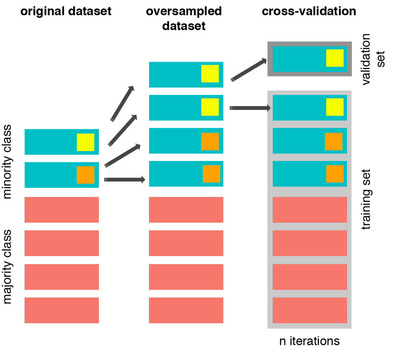

If we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below:

* The Right Way:

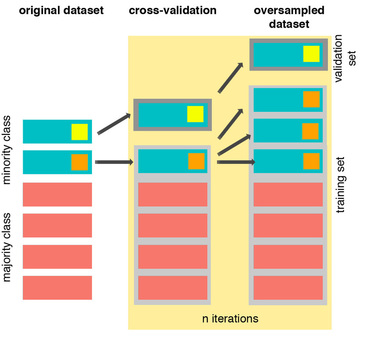

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(X_train), len(y_train)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(X_test), len(y_test)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])

    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))

print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 787 | Length of y (train): 787
Length of X (test): 197 | Length of y (test): 197
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9392405063291139
precision: 0.9668652204836417
recall: 0.9052631578947368
f1: 0.9341019214703424
---------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
y_score = best_est.decision_function(X_test)

In [ ]:
# Predict probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_pred_proba)
print("Average Precision Score:", average_precision)

Average Precision Score: 0.975811634685317


In [ ]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(X_test)
print(classification_report(y_test, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       0.85      0.97      0.90        87
       Fraud       0.97      0.86      0.91       110

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.98')

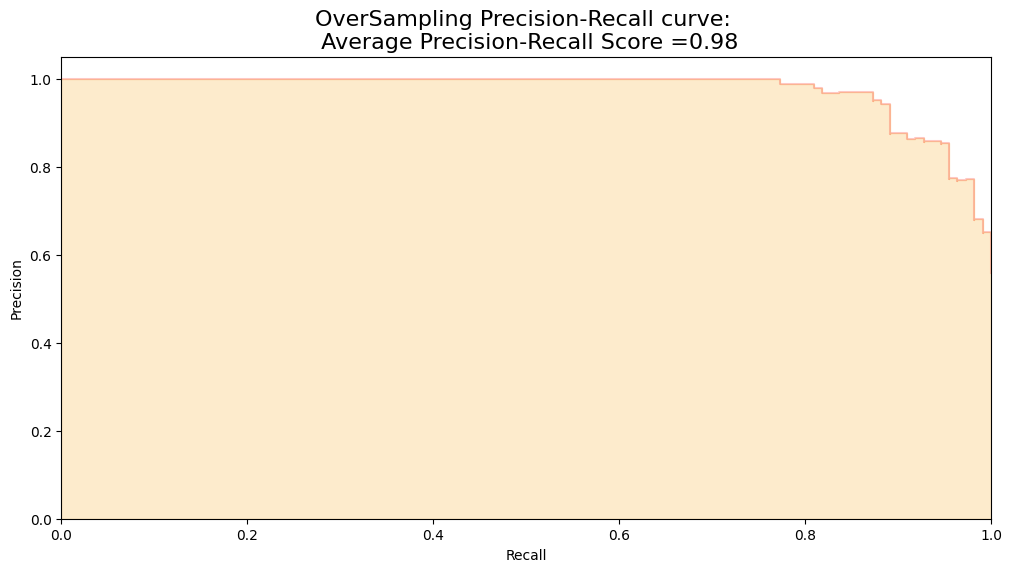

In [ ]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [ ]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)

# Use fit_resample instead of fit_sample
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)

In [ ]:
# We Improve the score by 2% points approximately
# Implement GridSearchCV and the other models.
# Define the parameter grid for Logistic Regression
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Create a Logistic Regression model
log_reg = LogisticRegression()

# Create a GridSearchCV object
grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='recall') # Assuming you want to optimize for recall

# Fit the GridSearchCV object to the training data (replace x_train and y_train with your actual training data)
grid_log_reg.fit(X_train, y_train)

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.015042543411254883 sec


### Test Data with Logistic Regression:

Confusion Matrix:

Positive/Negative: Type of Class (label) ["No", "Yes"] True/False: Correctly or Incorrectly classified by the model.

True Negatives (Top-Left Square): This is the number of correctly classifications of the "No" (No Fraud Detected) class.

False Negatives (Top-Right Square): This is the number of incorrectly classifications of the "No"(No Fraud Detected) class.

False Positives (Bottom-Left Square): This is the number of incorrectly classifications of the "Yes" (Fraud Detected) class

True Positives (Bottom-Right Square): This is the number of correctly classifications of the "Yes" (Fraud Detected) class.

* Summary:

    Random UnderSampling: We will evaluate the final performance of the classification models in the random undersampling subset. Keep in mind that this is not the data from the original dataframe.
    Classification Models: The models that performed the best were logistic regression and support vector classifier (SVM)


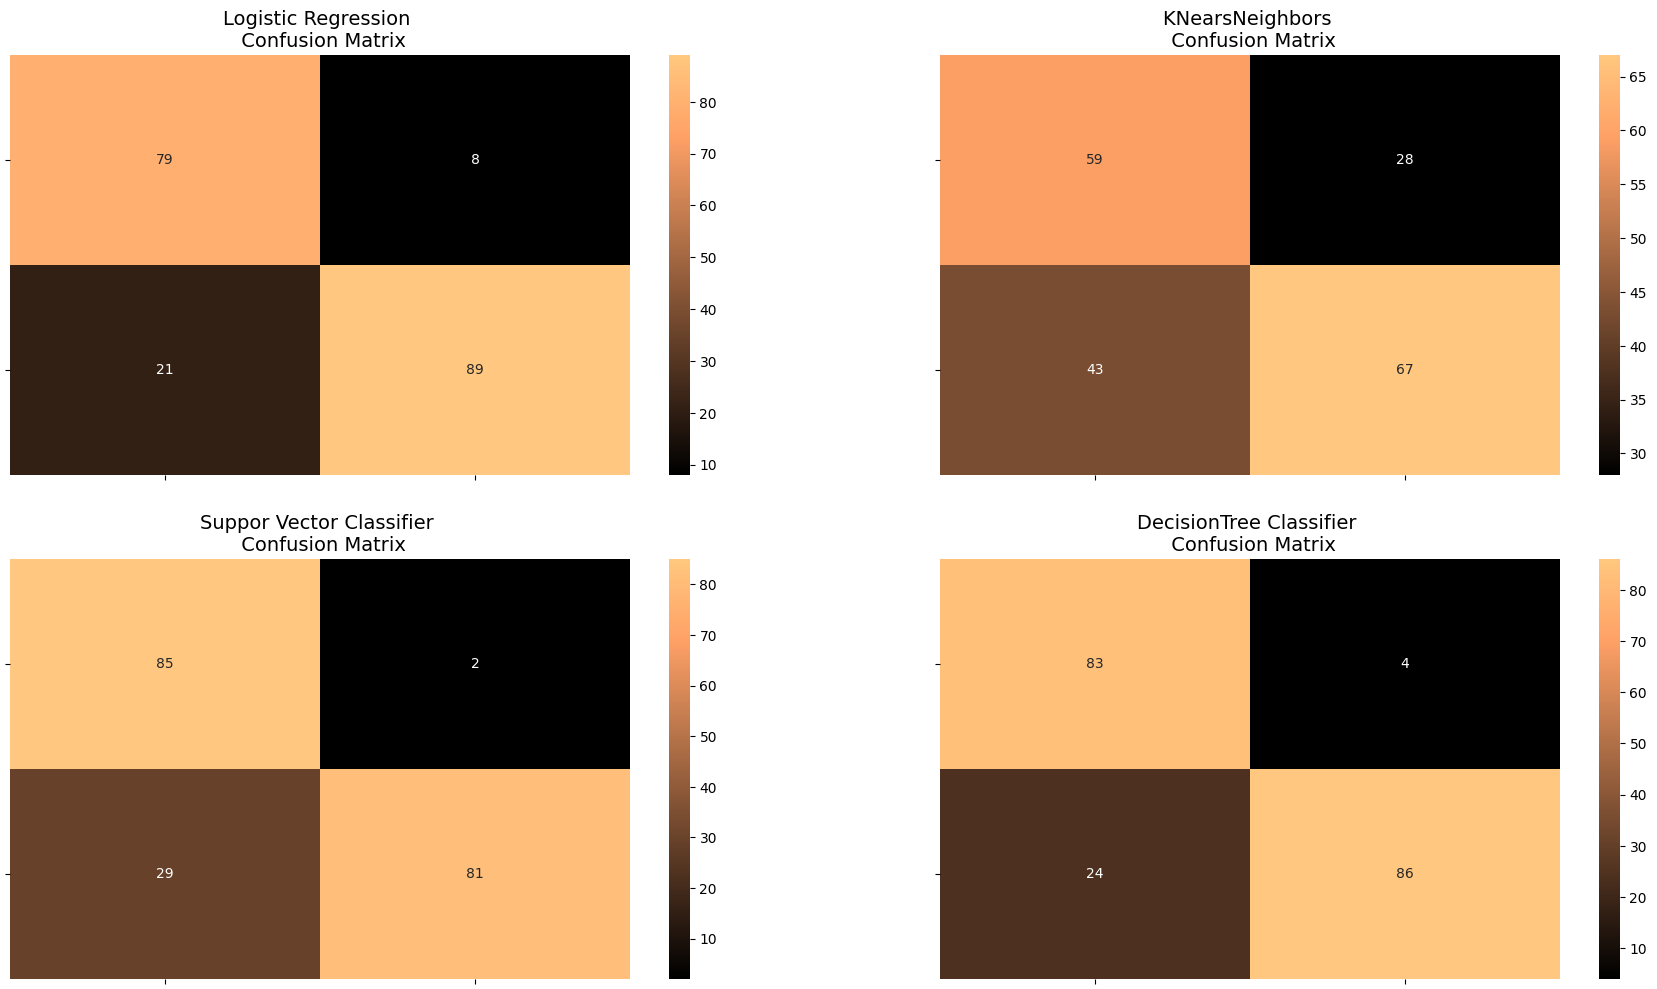

In [ ]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()


In [ ]:
print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        87
           1       0.92      0.81      0.86       110

    accuracy                           0.85       197
   macro avg       0.85      0.86      0.85       197
weighted avg       0.86      0.85      0.85       197

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        87
           1       0.71      0.61      0.65       110

    accuracy                           0.64       197
   macro avg       0.64      0.64      0.64       197
weighted avg       0.65      0.64      0.64       197

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        87
           1       0.98      0.74      0.84       110

    accuracy                           0.84       197
   macro avg       0.86      0.86      0.84       197
weighted

In [ ]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling - Use the best estimator from GridSearchCV
y_pred = grid_log_reg.best_estimator_.predict(X_test)  # Use the fitted estimator from GridSearchCV
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(X_test)
oversample_score = accuracy_score(y_test, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading!
final_df

,Technique,Score
0,Random UnderSampling,0.852792
1,Oversampling (SMOTE),0.908629


# **HANDLING IMBALANCES OF DATA**

###Removing the Duplicated Rows

In [ ]:
print(df.duplicated().sum())
df.shape

1081


(284807, 32)

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

SELECTING THE BEST FEATURES

In [ ]:
X1=df.drop(columns='Class',axis=1)
Y1=df['Class']
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3,random_state=42)

Mutual Information: [1.18563502e-03 1.43587268e-03 2.68069303e-03 4.01378079e-03
 4.18051687e-03 1.68862581e-03 1.93268994e-03 3.15437503e-03
 1.46262551e-03 3.56151015e-03 6.45898358e-03 5.63452015e-03
 6.49159132e-03 9.14597136e-05 7.07718737e-03 1.21630392e-04
 5.18844949e-03 7.18721142e-03 3.51573564e-03 1.06800513e-03
 8.81632363e-04 1.83649430e-03 0.00000000e+00 5.46054930e-04
 3.03932951e-04 3.31859877e-04 2.26416346e-04 1.98982887e-03
 1.35177154e-03 1.28694913e-03 1.71460937e-03]


<Axes: >

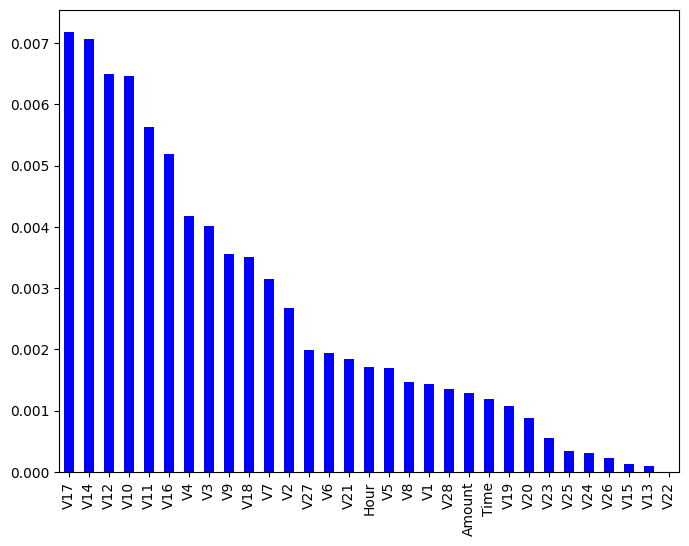

In [ ]:
mutual_info=mutual_info_classif(X1_train,Y1_train)
print("Mutual Information:",mutual_info)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X1_train.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,6),color='blue')

In [ ]:
# Getting the best features
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_classif,k=4)
cols.fit(X1_train,Y1_train)
X1_train.columns[cols.get_support()]

Index(['V10', 'V12', 'V14', 'V17'], dtype='object')

So, the most important features are **V17, V14, V12, V10.**

In [ ]:
x=df[['V17', 'V14','Time','Amount']]
y=df['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

### Applying Logistic Regression Method

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Checking the model performance

In [ ]:
# Calculating training and testing accuracy
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {round(train_accuracy,2)}")
print(f"Testing Accuracy: {round(test_accuracy,2)}")

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [ ]:
# Calculating the Classification Report
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, y_test_pred, target_names=['Non-Fraud', 'Fraud']))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     84983
       Fraud       0.85      0.51      0.64       135

    accuracy                           1.00     85118
   macro avg       0.93      0.76      0.82     85118
weighted avg       1.00      1.00      1.00     85118



The Confusion Matrix:
Here is again, how the confusion matrix works:

* Upper Left Square: The amount of correctly classified by our model
of no fraud transactions.

* Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .

* Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .

* Lower Right Square: The amount of correctly classified by our model of fraud transactions.

[[84971    12]
 [   66    69]]


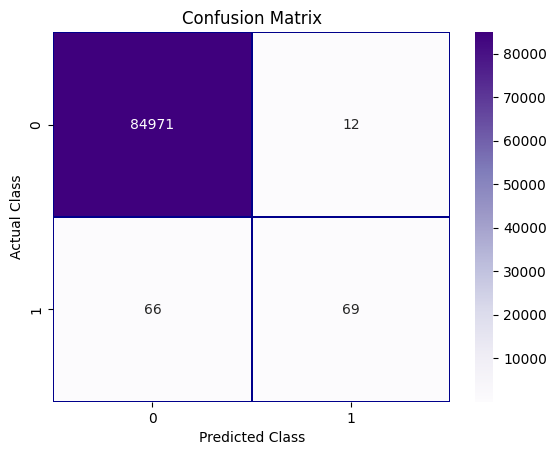

In [ ]:
# GENERATING THE CONFUSION MATRIX AS WELL AS DIAGRAMMATIC VISUALISATION

# Generating confusion matrix
c_m = metrics.confusion_matrix(y_test, y_test_pred)

# Printing the confusion matrix
print(c_m)

# Generating a heatmap visualization of the confusion matrix
sns.heatmap(c_m, annot=True, fmt="d", cmap='Purples', linewidths=.2,linecolor="Darkblue")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


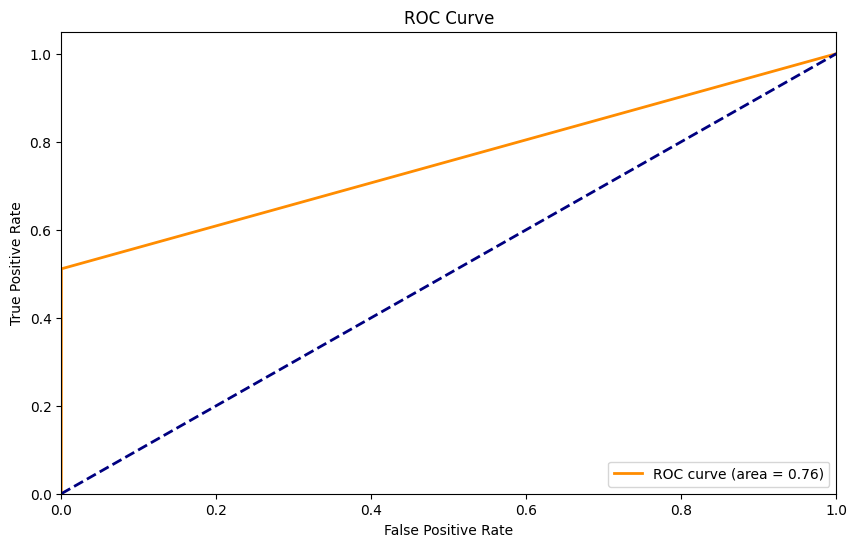

In [ ]:
# Import the auc function
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_test, y_test_pred)
# Calculate the AUC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.9348


### Predicting over new data

In [ ]:
# Predict over new data

import pandas as pd
new_data = pd.DataFrame({
    'V17': [0.233774, -0.007447],
    'V14': [-0.054545, -0.054545],
    'Time': [541.0, 541.0],
    'Amount': [234.0, 234.0]
})

predictions = model.predict(new_data)

for i, prediction in enumerate(predictions):
    if prediction == 0:
        print(f"Transaction {i+1}: Non-Fraud")
    else:
        print(f"Transaction {i+1}: Fraud")


Transaction 1: Non-Fraud
Transaction 2: Non-Fraud


# CONCLUSIONS

The detection of credit card fraud is a vital research field. This is because of the
increasing number of fraud cases in financial institutions. This issue opens the
door for employing artificial intelligence to build systems that can detect fraud.
Building an AI-based system to detect fraud requires a database to train the
system (or classifier). The data in reality are dirty and have missing values,
noisy data, and outliers. Such issues negatively affect the accuracy rate of the
system. To overcome these problems, a logistic regression-based classifier is
proposed.


# **REFERENCES**
[1] Credit Card Fraud Detection Database, Anonymized credit card transactions labeled as fraudulent or genuine, https://www.kaggle.com/mlg-ulb/creditcardfraud

[2] Principal Component Analysis, Wikipedia Page, https://en.wikipedia.org/wiki/Principal_component_analysis

[3] ROC-AUC characteristic, https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve